In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
PATH = 'D:\Semester 5\Deep Learning\Quiz\Quiz\Vehicle'
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [5]:
images = []
classes = []
labels = {}

for i, class_dir in enumerate(os.listdir(PATH)):
  for filename in os.listdir(os.path.join(PATH, class_dir)):
    image = load_img(os.path.join(PATH, class_dir, filename), target_size=(IMG_WIDTH, IMG_HEIGHT), color_mode='grayscale')
    image = img_to_array(image)

    classes.append(i)
    images.append(image)
  
  labels[i] = class_dir

  print(f'Load successful from class {class_dir}')

Load successful from class airplanes
Load successful from class cars
Load successful from class ship


In [6]:
X = np.array(images).astype('float32') / 255.0
y = tf.keras.utils.to_categorical(classes, num_classes=len(labels))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
model = Sequential([
    Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1)), 
    #Kalo diminta soal RGB Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)), 
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Dropout(0.2),
    Flatten(),

    Dense(units=128, activation='relu'),
    Dropout(0.3),
    Dense(units=len(labels), activation='softmax')
])

In [8]:
EPOCHS=10
LEARNING_RATE=0.0001
BATCH_SIZE=64

In [9]:
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
38/38 [==============================] - 272s 7s/step - loss: 0.9269 - accuracy: 0.5508 - val_loss: 0.7059 - val_accuracy: 0.7700
Epoch 2/10
38/38 [==============================] - 436s 11s/step - loss: 0.6259 - accuracy: 0.7429 - val_loss: 0.5722 - val_accuracy: 0.7733
Epoch 3/10
38/38 [==============================] - 333s 9s/step - loss: 0.4831 - accuracy: 0.8192 - val_loss: 0.4619 - val_accuracy: 0.8267
Epoch 4/10
38/38 [==============================] - 243s 6s/step - loss: 0.4014 - accuracy: 0.8587 - val_loss: 0.4072 - val_accuracy: 0.8767
Epoch 5/10
38/38 [==============================] - 237s 6s/step - loss: 0.3269 - accuracy: 0.8933 - val_loss: 0.3606 - val_accuracy: 0.8700
Epoch 6/10
38/38 [==============================] - 427s 11s/step - loss: 0.3269 - accuracy: 0.8800 - val_loss: 0.3681 - val_accuracy: 0.8667
Epoch 7/10
38/38 [==============================] - 245s 6s/step - loss: 0.2733 - accuracy: 0.9021 - val_loss: 0.3432 - val_accuracy: 0.8800
Epoch 8/10


In [11]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_real = np.argmax(y_test, axis=1)

for i in range(20):
  print(f'Sample {i}: Actual Label: {labels[y_real[i]]}, Predicted Label: {labels[y_pred[i]]}')

10/10 [==============================] - 20s 2s/step
Sample 0: Actual Label: cars, Predicted Label: cars
Sample 1: Actual Label: ship, Predicted Label: airplanes
Sample 2: Actual Label: cars, Predicted Label: cars
Sample 3: Actual Label: airplanes, Predicted Label: cars
Sample 4: Actual Label: cars, Predicted Label: cars
Sample 5: Actual Label: cars, Predicted Label: cars
Sample 6: Actual Label: ship, Predicted Label: ship
Sample 7: Actual Label: cars, Predicted Label: cars
Sample 8: Actual Label: airplanes, Predicted Label: airplanes
Sample 9: Actual Label: airplanes, Predicted Label: airplanes
Sample 10: Actual Label: airplanes, Predicted Label: ship
Sample 11: Actual Label: airplanes, Predicted Label: airplanes
Sample 12: Actual Label: ship, Predicted Label: airplanes
Sample 13: Actual Label: ship, Predicted Label: ship
Sample 14: Actual Label: cars, Predicted Label: cars
Sample 15: Actual Label: cars, Predicted Label: cars
Sample 16: Actual Label: ship, Predicted Label: ship
Sample

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

10/10 [==============================] - 11s 1s/step - loss: 0.2897 - accuracy: 0.9133
Test Loss: 0.2896934747695923
Test Accuracy: 0.9133333563804626


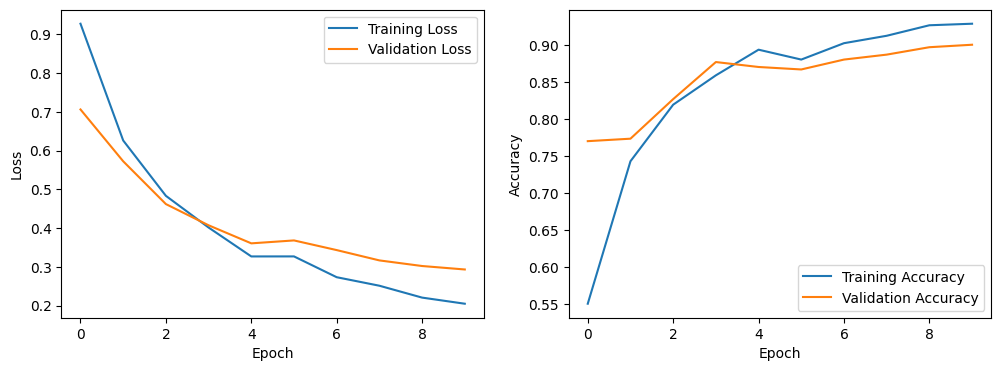

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()